## Q2 LDA

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
def print_latex(mat):
    s = r'\begin{bmatrix}' + '\n'
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            if j != mat.shape[1] - 1:
                s += '{: .4f} & '.format(mat[i,j])
            else:
                s += '{: .4f} \\\\\n'.format(mat[i,j])
    s += r'\end{bmatrix}'
    print(s)

(2, 100) (2, 100)


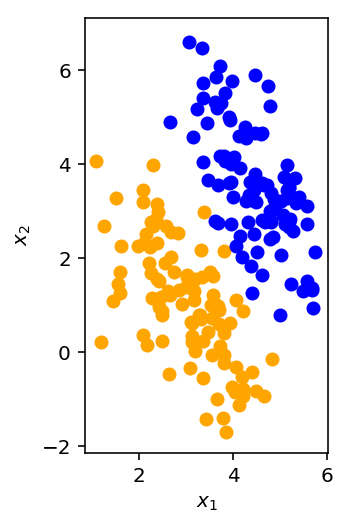

In [3]:
# Load the data and visualize.
Xs = np.load('lda.npy')

X_0 = np.matrix(Xs[:, 0:2]).T  # Shape: (2, 100).
X_1 = np.matrix(Xs[:, 2:4]).T  # Shape: (2, 100).

print(X_0.shape, X_1.shape)
plt.scatter(X_0[0].tolist(), X_0[1].tolist(), color='orange')
plt.scatter(X_1[0].tolist(), X_1[1].tolist(), color='blue')
plt.axis('scaled')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [4]:
# (a) Compute mean of each class.
mu_0 = np.mean(X_0)
mu_1 = np.mean(X_1)
print(mu_0.shape, mu_1.shape)
print('mu_0=\n{},\nmu_1=\n{}'.format(mu_0, mu_1))


() ()
mu_0=
2.0240272674589135,
mu_1=
3.9991901028324874


In [5]:
# (b) Compute the covariance matrix for each class, Sigma_0 and Sigma_1.
# Sigma_0, Sigma_1 = np.cov(X_0, rowvar = True), np.cov(X_1, rowvar = True)
Sigma_0, Sigma_1 = np.cov(X_0), np.cov(X_1)
print_latex(Sigma_0)
print_latex(Sigma_1)

\begin{bmatrix}
 0.7063 & -0.6905 \\
-0.6905 &  1.6147 \\
\end{bmatrix}
\begin{bmatrix}
 0.4898 & -0.5748 \\
-0.5748 &  1.6767 \\
\end{bmatrix}


\begin{bmatrix}
 0.7063 & -0.6905 \\
-0.6905 &  1.6147 \\
\end{bmatrix}
\begin{bmatrix}
 0.4898 & -0.5748 \\
-0.5748 &  1.6767 \\
\end{bmatrix}

In [6]:
# (c) Find the optimal w_star and w_tilde_star with unit length.
numerator = (mu_0 - mu_1)**2 # TODO: Multiply in Weights
inverse_sigma = np.linalg.inv((Sigma_0 + Sigma_1)) # TODO: Mult in W
denominator = np.linalg.norm(np.multiply(inverse_sigma,(mu_0 - mu_1)))
print(denominator)
w_star = np.dot(numerator,denominator)
w_tilde_star = (w_star/len(w_star))
print(w_star.shape, w_tilde_star.shape)
print('w_star=\n{},\nw_tilde_star=\n{}'.format(w_star, w_tilde_star))

3.32534623406349


TypeError: object of type 'numpy.float64' has no len()

\begin{bmatrix}
5.49708736 & 2.11321209] \\
2.11321209 & 1.99765898 \\
\end{bmatrix}
\begin{bmatrix}
2.74854368 & 1.05660605 \\
1.05660605 & 0.99882949 \\
\end{bmatrix}

In [7]:
# (d) Compute the projection and plot the figure.

np.dot(w_tilde_star,)
for i in range(len(X_0)):
    

plt.scatter(X_0[0].tolist(), X_0[1].tolist(), color='orange')
plt.scatter(X_1[0].tolist(), X_1[1].tolist(), color='blue')
plt.scatter(Xproj_0[0].tolist(), Xproj_0[1].tolist(), color='yellow')
plt.scatter(Xproj_1[0].tolist(), Xproj_1[1].tolist(), color='green')
plt.axis('scaled')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

IndentationError: expected an indented block (<ipython-input-7-b6d961eb247c>, line 7)

In [8]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import GridSearchCV
%config InlineBackend.figure_format = 'retina'

## Q5 Linear SVM

In [9]:
from sklearn.utils import shuffle

# 1) Load data.
X_and_Y = np.load('arrhythmia.npy')    # Load data from file
X_and_Y = np.matrix(shuffle(X_and_Y))   # Shuffle the data.
X = np.matrix(X_and_Y[:,0:278])   # First column to second to last column: Features (numerical values) 
Y = np.matrix(X_and_Y[:,279])    # Last column: Labels (0 or 1)
print(X.shape, Y.shape)       # Check the shapes.

(452, 278) (452, 1)


In [10]:
from sklearn.model_selection import train_test_split
# 2) Split the dataset into 2 parts: 
#    (a) Training set + Validation set  (80% of all data points)
#    (b) Test set                       (20% of all data points)

# Get features from test set. 
X_train_val, X_test = train_test_split(X, test_size=0.2, random_state=42) # Get features from train + val set. 
Y_train_val, Y_test = train_test_split(Y, test_size=0.2, random_state=42)# Get labels from train + val set.
# Get labels from test set. 
# Y_train_val = Y_train_val.reshape(361,:)
print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

(361, 278) (91, 278) (361, 1) (91, 1)


In [11]:
from sklearn import svm, grid_search
def svc_param_selection(X, y, nfolds):
    Cs = [0.00001,0.0001,0.001,0.01,0.1]
    gammas = [0.001, 0.01, 0.1, 1] # TODO: DELETE GAMMAS 
    param_grid = {'C': Cs, 'gamma' : gammas}
    y_flat = np.ravel(y)
    grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=nfolds)
    grid_search.fit(X, y_flat)
    return grid_search.best_params_
svc_param_selection(X_train_val,Y_train_val,3)

/Users/brody/anaconda2/envs/env36/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/brody/anaconda2/envs/env36/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'C': 0.0001, 'gamma': 0.001}

In [12]:
# 3) Consider linear kernel. Perform grid search for best C 
#    with 3-fold cross-validation. You can use svm.SVC() for SVM
#    classifier and use GridSearchCV() to perform such grid search.
#    For more details, please refer to the sklearn documents:
#         http://scikit-learn.org/stable/modules/svm.html
#         http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

def svc_linear_classifier(X,y,cross_val):
    C_list = [0.00001,0.0001,0.001,0.01,0.1]
    y_flat = np.ravel(Y_train_val)
    parameters = {'kernel':['linear'], 'C':C_list}
    svc = SVC(gamma='auto')
    classifier = GridSearchCV(SVC(),
                                  parameters,
                                  cv=cross_val)
    classifier.fit(X,y_flat)
    means = classifier.cv_results_['mean_test_score']
    stds = classifier.cv_results_['std_test_score']
    SVC_arr = []
    print("Best parameters set found on test set:")
    print(classifier.best_params_)
    for mean, std, params in zip(means, stds, classifier.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
        SVC_arr.append(mean)
    return SVC_arr, classifier
SVC_acc = svc_linear_classifier(X_train_val, Y_train_val, 3)

NameError: name 'SVC_accsvc_linear_classifier' is not defined

In [ ]:
# 4) Draw heatmaps for result of grid search and find 
#    best C for validation set.

def draw_heatmap_linear(acc, acc_desc, C_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()
    
#
# You can use the draw_heatmap_linear() to draw a heatmap to visualize 
# the accuracy w.r.t. C and gamma. Some demo code is given below as hint:
#
# demo_acc        = np.array([[0.8],
#                             [0.7]])
# demo_C_list     = [0.1, 1]
# draw_heatmap_linear(demo_acc, 'demo accuracy', demo_C_list)
#

C_list = [0.00001,0.0001,0.001,0.01,0.1]
# accuracy = [x[1] for x in classifier.grid_scores_]
# train_acc = np.array(accuracy).reshape(len(C_list))

# Gamma Values 
accuracy_array = np.array(SVC_arr)
train_acc = np.array([[0.8],
                      [0.7]]) 
draw_heatmap_linear(train_acc, 'train accuracy', C_list)

val_acc = np.array([[0.001],
                    [0.01],
                    [0.1],
                    [1.0]])
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [ ]:
# 5) Use the best C to calculate the test accuracy.

test_acc = __________________
print(test_acc)

## Question 6: Implement Grid Search and Cross-Validation

In [75]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.grid_search import ParameterGrid
from sklearn.svm import SVC

%config InlineBackend.figure_format = 'retina'

In [76]:
from sklearn.utils import shuffle

# 1) Load data.
X_and_Y = np.load('arrhythmia.npy')    # Load data from file
X_and_Y = np.matrix(shuffle(X_and_Y))   # Shuffle the data.
X = np.matrix(X_and_Y[:,0:278])   # First column to second to last column: Features (numerical values) 
Y = np.matrix(X_and_Y[:,279])    # Last column: Labels (0 or 1)
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2) # Split the Dataset
print("X: ",X.shape, "Y: ", Y.shape)       # Check the shapes.
print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

X:  (452, 278) Y:  (452, 1)
(361, 278) (91, 278) (361, 1) (91, 1)


### Part 1
    1: Divide training and validation into 4 folds
    2: Train the SVM w/ RBF kernel for fold round. 
          Each round choose a subset as validation set & fold - 1 as the training set
    3: Calc Trng acc and Valid_acc every round
    4: Finally, return the avg training acc and avg valid acc over all rounds

In [91]:
from sklearn.model_selection import KFold
def svc_linear_classifier(X,y,n_folds):
    C_list = [0.00001,0.0001,0.001,0.01,0.1]
    SVC_arr = []
    y_flat = np.ravel(y)
    kf = KFold(n_splits=folds)     #Split train_val set
    # Train the SVM with RBF kernel for fold rounds 
    classiifer = SVC(C=C_list,kernel='rbf',degree=n_folds)
    for train_index, valid_index in kf.split(X):
        X_train, X_valid = X[train_index], X[valid_index]
        print(X_train.shape, X_valid.shape)
        # Each round choose one different subset as validation set 
        # All of the other data points (all the other fold - 1 subsets) are the training set.
        classiifer.fit(X_train, X_valid)
        # Calculate the training accuracy and validation accuracy every round. 
        means = classifier.cv_results_['mean_test_score']
        stds = classifier.cv_results_['std_test_score']

        print("Best parameters set found on test set:")
        print(classifier.best_params_)
        for mean, std, params in zip(means, stds, classifier.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
            SVC_arr.append(mean)
    # Return the avg training accuracy & average validation accuracy over all rounds.
    return SVC_arr, classifier
svc_linear_classifier(X_train_val,X_test,2) # TODO: del y

(180, 278) (181, 278)


ValueError: bad input shape (181, 278)

In [80]:
def split_dataset(X, fold, n_folds):
#     data = len(n)
#     return n[n*(i-1)//k:n*i//k] # i=round,k=totalrounds
    data = len(X)
    fold = X[data * (fold - 1) // n_folds : data * fold // n_folds]
        
def svc_linear_classifier(X,y,n_folds):
    C_list = [0.00001,0.0001,0.001,0.01,0.1]
    y_flat = np.ravel(Y_train_val)
#     parameters = {'kernel':['rbf'], 'C':C_list}
    svc = SVC(gamma='auto', kernel='rbf')
    
    train_val_X = split_dataset(X,1,4)  
    test_X = split_dataset(X,2,4)
    train_val_Y = split_dataset(X,3,4)
    test_Y = split_dataset(X,4,4)
    print(train_val_X.shape, test_X.shape, train_val_Y.shape, test_Y.shape)
    
#     data_subset = {k: [] for k in range(n_folds+1)}
# #     data_subset = [train_val_X:[],test_X:[],train_val_Y:[],test_Y:[]]
#     data = len(X)
#     for fold in range(n_folds):
#         # Cross-Validation
#         split_data = X[data * (fold - 1) // n_folds : data * fold // n_folds]
#         # TODO: append the subset to the 
#         data_subset[rounds].append(fold)
        
            
#     print(len(data_subset)) 
#     print(data_subset[3][0])

    
    # Printing Prettiness
    means = classifier.cv_results_['mean_test_score']
    stds = classifier.cv_results_['std_test_score']
    SVC_arr = []
    print("Best parameters set found on test set:")
    print(classifier.best_params_)
    for mean, std, params in zip(means, stds, classifier.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
        SVC_arr.append(mean)
    return SVC_arr, classifier
# SVC_acc, SVC_class = svc_linear_classifier(X_train_val, Y_train_val, 4)
svc_linear_classifier(X_train_val, Y_train_val, 4)

AttributeError: 'NoneType' object has no attribute 'shape'

In [29]:
def svc_linear_classifier(X,y,n_folds):
    C_list = [0.00001,0.0001,0.001,0.01,0.1]
    y_flat = np.ravel(Y_train_val)
    parameters = {'kernel':['rbf'], 'C':C_list}
    svc = SVC(gamma='auto', kernel='rbf')

    train_val_X = split_dataset(X,1,4)  
    test_X = split_dataset(X,2,4)
    train_val_Y = split_dataset(X,3,4)
    test_Y = split_dataset(X,4,4)
    for rounds in range(n_folds):

        # TODO: append the subset to the 
        data_subset[rounds].append(fold)

matrix([[ 50. ,   0. , 184. , ...,   0.4,   0.3,  26.4],
        [ 34. ,   1. , 159. , ...,   0.7,   0.6,   8.8],
        [ 60. ,   1. , 160. , ...,   0.8,   0.5,  19.6],
        ...,
        [ 40. ,   0. , 172. , ...,   0.8,   1.3,  38.4],
        [ 40. ,   1. , 160. , ...,   0.4,   1. ,  14.3],
        [ 43. ,   0. , 163. , ...,   0. ,   2.3,  14.7]])

In [ ]:
# GridSearch
for g in ParameterGrid(grid):
    rf.set_params(**g)
    rf.fit(X,y)
    # save if best
    if rf.oob_score_ > best_score:
    best_score = rf.oob_score_
    best_grid = g